In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [41]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
univ=pd.read_csv('/content/University_data_Clustering_2.csv')

In [43]:
univ.head(100)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornel,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [44]:
#Normalization function
univ2=univ.iloc[:,1:]
scalling=MinMaxScaler()
df_norm=pd.DataFrame(scalling.fit_transform(univ2),columns=univ2.columns)

In [45]:
#Normalized dataframe (Considering the numerical part of data)
df_norm.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


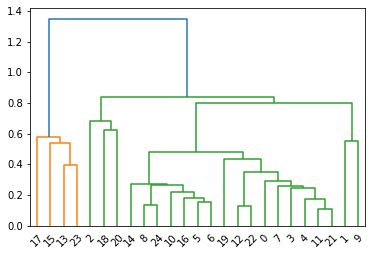

In [56]:
#Create a dandrogram
deng=sch.dendrogram(sch.linkage(df_norm,method="average"))

In [65]:
#create Cluster
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [66]:
#Bulid cluster algorithm
y_hc=hc.fit_predict(df_norm)

In [68]:
cluster=pd.DataFrame(y_hc,columns=['cluster'])
cluster

,cluster
0,0
1,3
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [71]:
univ['h,clusterid']=hc.labels_

In [72]:
hc.labels_

array([0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0])

In [73]:
cluster

,cluster
0,0
1,3
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [76]:
univ.head(25)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,"h,clusterid"
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornel,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
